# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

**This notebook will be mainly used for the capstone project**

## Table of Contents 
* [Introduction of Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#methedology)
* [Data Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction of Business Problem <a name="introduction"></a>

<p style='text-align: justify;'>London is one of world’s most important global cities and is considered to be the most multicultural city in the world, and this is reflected onto the different cuisines on offer. The purpose of this project is to use Data Science and Machine Learning approach to find an optimal Uyghur restaurant location in London. Target of the audience is the businessman who want to invest in or open a new restuarant in London</p>

<p style='text-align: justify;'>Due to the characteristics of Uyghur food being fast to prepare, unique, common market targets is defined to be business professionals, families with children, culture aficionados and fast-food customers. In terms of ethnic group, Uyghur cuisine reflects the cooking styles of many ethnic groups of the Xinjiang region in China and is regarded one of the most popular cuisine among Chinese. The Uyghur food is predominantly halal. Therefore, in addition to Chinese workers, residents and tourists, Muslim population and tourists can be potential customer of the New Restaurant.</p> 

While choosing an optimal restaurant location, the following factors needs to be considered :
1. Accessibility: When looking at a restaurant location, the amount or accessibility of nearby parking, ease of access by car, foot traffic and surrounding traffic patterns should be taken into consideration to make it as easy as possible for customer to visit the new restaurant. The target locations should acquire enough traffic to fill tables organically, without any help from digital marketing or promotional efforts. Accessibility is evaluated using the parameter "__Public Transport Accessibility__" in the data analysis.

2. Visibility: Making the New Restaurant or restaurant sigh visible to the public is like free advertising. It reminds the passers-by that a restaurant exists, and they should stop by for dinner sometime.It is described by the parameter "**Distance to Mearst Station**". 

3. Target Demographics: A target demographic is a specific grouping of consumers that you market your products toward. Demographics are defined by specific characteristics such as age, gender or income level. A combination of all these factors creates the best demographic picture to help determine how a certain location would affect the New Restaurant. The target demographics is the **middle class Chinese and Musli Business Professionals, Tourists, Residences who have average salary between £30000- £80000**.

4. Safety/Crime Rates: Extra insurance, exterior lighting and loss of customers due to safety concerns can spell disaster for the success of a new restaurant. Hence, it is critical to recognise and address the issues of safety and crime rates early on.It is evaluated using parameter "**Crime Rates**".

5. Complimentary Businesses: By “complementary businesses”, it is referred to the neighbouring businesses that could share their market with the New Restaurant but aren’t competition. The activities of complementary businesses actually drive diners to the New Restaurant. Simply being in close proximity to them can increase the foot traffic. Complementary businesses include but aren’t limited to stadiums, theatres, business districts, transportation hubs, and malls. For example, Office buildings can bring hungry professionals to the New Restaurant for lunch. Restaurant near the train stations can attract commuters. In the vicinity of Theatres and stadiums, restaurants can capture attendees pre-and-post performance or a big game. Therefore, considering the effect of complimentary business, the following criteria are set to select the optimal locations: 
  - Area with high **Job-Density**
  - Location have **Distance to Station** less than 0.3km
  - Location which have more than 5 venues in the radius of 500m.


6. Direct and Indirect Competitors: When choosing a location, it is prudent to make sure that the market is not over-saturated. Some competition is healthy, but if there are multiple restaurants with the same cuisine and concept as the New Restaurant, we need to look for another location. In addition, it is important to make sure that businesses nearby are thriving. This indicates that there’s an appetite for consumption. Furthermore, identifying gap is one of the key points for a successful restaurant. If there’s a way we can refine the New Restaurant concept based on a market gap, the odds of success heighten. Competitor analysis are carried out in this Data Analysis, by which the following criteria are proposed to select the optimal locations:

  - There is no Chinese or Turkish Restaurants in the 500m radius of the target location
  - There is no more than 1 restaurant in the 500m radius of the target location.

## Data Description <a name="data"></a>

Two kinds of data are required for this project: location data and demographic data in each borough and post code area. I collected demographic data of all Boroughs and post code areas in Greater London.
  - **London Borough Profiles**: It is a csv file describes the demographic profiles of 33 London Boroughs. It contains data such as population, household, household median income, job density, active businesses, crime rates, median house price, public transport accessibility etc.
  -**Ethnic Groups Borough**: Its data format is xls. It describes the population of ethnic groups (White, Asian, Black and Mixed/Other) in all London Boroughs.
  -**London Postcodes**: Its data format is csv. It contains information postcode, latitude, longitude, nearest station, distance to station, borough, rural/urban areas, average income.
  -**Location Data**:  Foursquare location data describing places and venues such as their geographical location in form of geographical coordinates (latitude and longitude value), their category, nearby venues etc.

## Methodology <a name="methodology"></a>

In this project, we will use Data Science and Machine Learning methods to locate the target areas and analyse each target area and list top 15 optimal locations for a new Uyghur Restaurant in London. 
In order to filter out inappropriate locations, the followings criteria are implemented to narrow down the target areas in Greater London.
  + Public Transport Accessibility Score
  + Distance to the nearest station
  + Job density
  + Household Median Income
  + Average Salary (£30000-£80000)
  + Ethnic group population(Asian and Other/Mixed)
  + Crime rates
  + Number of active businesses 
  + Number of venues near the target areas
  + Distance to the nearest station=<0.3 km
  + Number of restaurants within 500m radius of target locations <=1
  + Number of Chinese and Turkish restaurants within 500m radius of target locations=0
  + Median House Price

As there is a number of factors which need to be considered while deciding, clustering method will be used to reduce the scale of the data and narrow down the targeted locations. Clustering will be used to create centres of zones that contain targeted postcode areas as clustering is an effective analytical approach to deriving segments and groups from large datasets. 


In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Download London Borough Profile data and read it into a dataframe
link = "https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv"
df_borough=pd.read_csv(link, encoding='unicode_escape')
df_borough.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [3]:
# Get the information of the dataframe
df_borough.columns

Index(['Code', 'Area_name', 'Inner/_Outer_London',
       'GLA_Population_Estimate_2017', 'GLA_Household_Estimate_2017',
       'Inland_Area_(Hectares)', 'Population_density_(per_hectare)_2017',
       'Average_Age,_2017', 'Proportion_of_population_aged_0-15,_2015',
       'Proportion_of_population_of_working-age,_2015',
       'Proportion_of_population_aged_65_and_over,_2015',
       'Net_internal_migration_(2015)', 'Net_international_migration_(2015)',
       'Net_natural_change_(2015)',
       '%_of_resident_population_born_abroad_(2015)',
       'Largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_largest_migrant_population_(2011)',
       'Second_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_second_largest_migrant_population_(2011)',
       'Third_largest_migrant_population_by_country_of_birth_(2011)',
       '%_of_third_largest_migrant_population_(2011)',
       '%_of_population_from_BAME_groups_(2016)',
       '%_people_aged_3+_whose_main_

In [4]:
# drop the columns that will not be used in this project and clean the column names

column_names=['Code','Area_name','Inner/_Outer_London','GLA_Population_Estimate_2017','GLA_Household_Estimate_2017','Modelled_Household_median_income_estimates_2012/13','Jobs_Density,_2015','Number_of_active_businesses,_2015','Crime_rates_per_thousand_population_2014/15','Median_House_Price,_2015','Average_Public_Transport_Accessibility_score,_2014']
df_borough_essential=df_borough.loc[:,column_names]
df_borough_essential.columns=['Code','Borough','Inner_Outer_London','Population','Household','Household_Median_Income','Jobs_Density','Active_Businesses','Crime_Rates','Median_House_Price','Public_Transport_Accessibility']
df_borough_essential=df_borough_essential.iloc[:33]
df_borough_essential

,Code,Borough,Inner_Outer_London,Population,Household,Household_Median_Income,Jobs_Density,Active_Businesses,Crime_Rates,Median_House_Price,Public_Transport_Accessibility
0,E09000001,City of London,Inner London,8800,5326,"£63,620",84.3,26130,.,799999,7.9
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"£29,420",0.5,6560,83.4,243500,3
2,E09000003,Barnet,Outer London,389600,151423,"£40,530",0.7,26190,62.7,445000,3
3,E09000004,Bexley,Outer London,244300,97736,"£36,990",0.6,9075,51.8,275000,2.6
4,E09000005,Brent,Outer London,332100,121048,"£32,140",0.6,15745,78.8,407250,3.7
5,E09000006,Bromley,Outer London,327900,140602,"£43,060",0.6,15695,64.1,374975,2.8
6,E09000007,Camden,Inner London,242500,107654,"£43,750",2.2,31385,123.5,700000,5.7
7,E09000008,Croydon,Outer London,386500,159010,"£37,000",0.6,15540,77,300000,3.2
8,E09000009,Ealing,Outer London,351600,132663,"£36,070",0.7,18700,75.5,430000,3.3
9,E09000010,Enfield,Outer London,333000,130328,"£33,110",0.6,13925,69.4,320000,3


In [5]:
# Obtain the information of the new dataframe
df_borough_essential.shape

(33, 11)

In [6]:
# find out which boroughs are located in inner London and which boroughs belong to outer London
df_borough_essential.sort_values(by=["Inner_Outer_London"])

,Code,Borough,Inner_Outer_London,Population,Household,Household_Median_Income,Jobs_Density,Active_Businesses,Crime_Rates,Median_House_Price,Public_Transport_Accessibility
0,E09000001,City of London,Inner London,8800,5326,"£63,620",84.3,26130,.,799999,7.9
29,E09000030,Tower Hamlets,Inner London,304000,123720,"£34,930",1.4,18390,99.9,415000,5
27,E09000028,Southwark,Inner London,314300,134254,"£37,100",1.3,17120,100.6,475000,4.9
24,E09000025,Newham,Inner London,342900,119172,"£28,780",0.5,11055,90.8,305000,3.9
22,E09000023,Lewisham,Inner London,303400,131076,"£35,900",0.4,10405,77,352000,4.1
21,E09000022,Lambeth,Inner London,328900,144400,"£38,490",0.8,17280,104.6,450000,5
19,E09000020,Kensington and Chelsea,Inner London,159000,80200,"£55,620",1.4,14350,120.9,1200000,5.8
18,E09000019,Islington,Inner London,231200,105038,"£39,790",1.5,22110,121.2,583000,5.7
31,E09000032,Wandsworth,Inner London,321000,138149,"£47,480",0.6,18695,72.6,557000,4.3
13,E09000014,Haringey,Inner London,278000,115608,"£35,420",0.5,12675,90.2,432500,4.3


In [7]:
# print the name of boroughs which are located in the inner London and outer London
print("There are {} bouroughs in Inner London. They are {}".format(len(df_borough_essential.loc[df_borough_essential['Inner_Outer_London']=='Inner London',:]['Borough']), df_borough_essential.loc[df_borough_essential['Inner_Outer_London']=='Inner London',:]['Borough'].values))
print("There are {} bouroughs in Outer London. They are {}".format(len(df_borough_essential.loc[df_borough_essential['Inner_Outer_London']=='Outer London',:]['Borough']), df_borough_essential.loc[df_borough_essential['Inner_Outer_London']=='Outer London',:]['Borough'].values))

There are 14 bouroughs in Inner London. They are ['City of London' 'Camden' 'Hackney' 'Hammersmith and Fulham' 'Haringey'
 'Islington' 'Kensington and Chelsea' 'Lambeth' 'Lewisham' 'Newham'
 'Southwark' 'Tower Hamlets' 'Wandsworth' 'Westminster']
There are 19 bouroughs in Outer London. They are ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Croydon'
 'Ealing' 'Enfield' 'Greenwich' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Kingston upon Thames' 'Merton' 'Redbridge'
 'Richmond upon Thames' 'Sutton' 'Waltham Forest']


In [8]:
# find out the types of each column
df_borough_essential.dtypes

Code                               object
Borough                            object
Inner_Outer_London                 object
Population                          int64
Household                          object
Household_Median_Income            object
Jobs_Density                      float64
Active_Businesses                   int64
Crime_Rates                        object
Median_House_Price                 object
Public_Transport_Accessibility     object
dtype: object

In [9]:
# remove the pound sign and comma in column "Household_Median_Income"
df_borough_essential["Household_Median_Income"]=df_borough_essential["Household_Median_Income"].astype(str).str.replace('£','').str.replace(',','')
df_borough_essential.head()

,Code,Borough,Inner_Outer_London,Population,Household,Household_Median_Income,Jobs_Density,Active_Businesses,Crime_Rates,Median_House_Price,Public_Transport_Accessibility
0,E09000001,City of London,Inner London,8800,5326,63620,84.3,26130,.,799999,7.9
1,E09000002,Barking and Dagenham,Outer London,209000,78188,29420,0.5,6560,83.4,243500,3
2,E09000003,Barnet,Outer London,389600,151423,40530,0.7,26190,62.7,445000,3
3,E09000004,Bexley,Outer London,244300,97736,36990,0.6,9075,51.8,275000,2.6
4,E09000005,Brent,Outer London,332100,121048,32140,0.6,15745,78.8,407250,3.7


In [10]:
# convert Household_Nr, Population_Density_Household_Median_Income,Media_House_Price, Public_Transport_Accessibility to float
cols=df_borough_essential.columns.drop(['Code','Borough','Inner_Outer_London'])
df_borough_essential[cols]=df_borough_essential[cols].apply(pd.to_numeric, errors='coerce')
df_borough_essential.head()

,Code,Borough,Inner_Outer_London,Population,Household,Household_Median_Income,Jobs_Density,Active_Businesses,Crime_Rates,Median_House_Price,Public_Transport_Accessibility
0,E09000001,City of London,Inner London,8800,5326,63620,84.3,26130,NaN,799999,7.9
1,E09000002,Barking and Dagenham,Outer London,209000,78188,29420,0.5,6560,83.4,243500,3.0
2,E09000003,Barnet,Outer London,389600,151423,40530,0.7,26190,62.7,445000,3.0
3,E09000004,Bexley,Outer London,244300,97736,36990,0.6,9075,51.8,275000,2.6
4,E09000005,Brent,Outer London,332100,121048,32140,0.6,15745,78.8,407250,3.7


In [11]:
# check the data type again
df_borough_essential.dtypes

Code                               object
Borough                            object
Inner_Outer_London                 object
Population                          int64
Household                           int64
Household_Median_Income             int64
Jobs_Density                      float64
Active_Businesses                   int64
Crime_Rates                       float64
Median_House_Price                  int64
Public_Transport_Accessibility    float64
dtype: object

In [12]:
# find out the missing values
missing_data=df_borough_essential.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())

False    33
Name: Code, dtype: int64
False    33
Name: Borough, dtype: int64
False    33
Name: Inner_Outer_London, dtype: int64
False    33
Name: Population, dtype: int64
False    33
Name: Household, dtype: int64
False    33
Name: Household_Median_Income, dtype: int64
False    33
Name: Jobs_Density, dtype: int64
False    33
Name: Active_Businesses, dtype: int64
False    32
True      1
Name: Crime_Rates, dtype: int64
False    33
Name: Median_House_Price, dtype: int64
False    33
Name: Public_Transport_Accessibility, dtype: int64


In [13]:
# There is one missing value in column "Crime_Rates". Replace this missing value with the average of the Crime_Rates of all boroughs in London.
Median_Crime=df_borough_essential["Crime_Rates"].median()
df_borough_essential["Crime_Rates"]=df_borough_essential["Crime_Rates"].replace(np.nan, Median_Crime)

In [14]:
# drop the column of Inner_Outer_London
df_borough_para=df_borough_essential.drop(['Inner_Outer_London'],axis=1)
df_borough_para

,Code,Borough,Population,Household,Household_Median_Income,Jobs_Density,Active_Businesses,Crime_Rates,Median_House_Price,Public_Transport_Accessibility
0,E09000001,City of London,8800,5326,63620,84.3,26130,77.5,799999,7.9
1,E09000002,Barking and Dagenham,209000,78188,29420,0.5,6560,83.4,243500,3.0
2,E09000003,Barnet,389600,151423,40530,0.7,26190,62.7,445000,3.0
3,E09000004,Bexley,244300,97736,36990,0.6,9075,51.8,275000,2.6
4,E09000005,Brent,332100,121048,32140,0.6,15745,78.8,407250,3.7
5,E09000006,Bromley,327900,140602,43060,0.6,15695,64.1,374975,2.8
6,E09000007,Camden,242500,107654,43750,2.2,31385,123.5,700000,5.7
7,E09000008,Croydon,386500,159010,37000,0.6,15540,77.0,300000,3.2
8,E09000009,Ealing,351600,132663,36070,0.7,18700,75.5,430000,3.3
9,E09000010,Enfield,333000,130328,33110,0.6,13925,69.4,320000,3.0


In [15]:
df_borough_para['Borough']=df_borough_para['Borough'].astype(str)
df_borough_para.dtypes

Code                               object
Borough                            object
Population                          int64
Household                           int64
Household_Median_Income             int64
Jobs_Density                      float64
Active_Businesses                   int64
Crime_Rates                       float64
Median_House_Price                  int64
Public_Transport_Accessibility    float64
dtype: object

**First analysis is to select most suitable boroughs**. 
1. Find out top 7 boroughs that have
 - highest public transport accessibility
 - Job density
 - Household Median Income more than £4000
 - Highest Active Businesses 
 - Crime Rates
 - House Price
 - Highest Number of target echnic group population
 

In [16]:
# find out top 7 boroughs that have highest public transport accessibility
Top_number=7
df_transport_top7=df_borough_para.sort_values(by='Public_Transport_Accessibility', ascending=False).head(Top_number)[['Borough','Public_Transport_Accessibility']]
df_transport_top7.reset_index(drop=True)

,Borough,Public_Transport_Accessibility
0,City of London,7.9
1,Westminster,6.5
2,Kensington and Chelsea,5.8
3,Camden,5.7
4,Islington,5.7
5,Lambeth,5.0
6,Tower Hamlets,5.0


In [17]:
#find out 7 boroughs that has the highest job density 
df_job_top7=df_borough_para.sort_values(by='Jobs_Density', ascending=False).head(Top_number)[['Borough','Jobs_Density']]
df_job_top7.reset_index(drop=True)

,Borough,Jobs_Density
0,City of London,84.3
1,Westminster,4.3
2,Camden,2.2
3,Islington,1.5
4,Tower Hamlets,1.4
5,Kensington and Chelsea,1.4
6,Southwark,1.3


In [18]:
#find out 7 boroughs that has the highest Household Median Income
df_income_top7=df_borough_para.sort_values(by='Household_Median_Income', ascending=False).head(Top_number)[['Borough','Household_Median_Income']]
df_income_top7.reset_index(drop=True)

,Borough,Household_Median_Income
0,City of London,63620
1,Kensington and Chelsea,55620
2,Richmond upon Thames,53470
3,Westminster,47510
4,Wandsworth,47480
5,Kingston upon Thames,43940
6,Hammersmith and Fulham,43820


In [19]:
#select boroughs that has hoursehold median income bigger than 40000£
df_income_target=df_borough_para[df_borough_para['Household_Median_Income']>=40000].sort_values(by='Household_Median_Income', ascending=False)[['Borough','Household_Median_Income']]
df_income_target.reset_index(drop=True)

,Borough,Household_Median_Income
0,City of London,63620
1,Kensington and Chelsea,55620
2,Richmond upon Thames,53470
3,Westminster,47510
4,Wandsworth,47480
5,Kingston upon Thames,43940
6,Hammersmith and Fulham,43820
7,Camden,43750
8,Bromley,43060
9,Merton,41960


In [20]:
# find out 7 boroughs that has the most prosperous businesses 
df_prosperity_top7=df_borough_para.sort_values(by='Active_Businesses', ascending=False).head(Top_number)[['Borough','Active_Businesses']]
df_prosperity_top7.reset_index(drop=True)

,Borough,Active_Businesses
0,Westminster,55385
1,Camden,31385
2,Barnet,26190
3,City of London,26130
4,Islington,22110
5,Ealing,18700
6,Wandsworth,18695


In [21]:
# find boroughs that has crime rate lower than median of crime rate of all boroughs
df_crime_top7=df_borough_para.sort_values(by='Crime_Rates', ascending=False).head(Top_number)[['Borough','Crime_Rates']]
#df_borough_para[df_borough_para['Crime_Rates']>= Median_Crime].sort_values(by='Crime_Rates', ascending=False)[['Borough','Crime_Rates']].set_index('Borough')
df_crime_top7.reset_index(drop=True)

,Borough,Crime_Rates
0,Westminster,212.4
1,Camden,123.5
2,Islington,121.2
3,Kensington and Chelsea,120.9
4,Hammersmith and Fulham,113.2
5,Lambeth,104.6
6,Southwark,100.6


In [22]:
# find boroughs that have highest house price
df_house_price_top7=df_borough_para.sort_values(by='Median_House_Price', ascending=False).head(Top_number)[['Borough','Median_House_Price']]
df_house_price_top7.reset_index(drop=True)

,Borough,Median_House_Price
0,Kensington and Chelsea,1200000
1,Westminster,920000
2,City of London,799999
3,Hammersmith and Fulham,730000
4,Camden,700000
5,Islington,583000
6,Richmond upon Thames,575000


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.pyplot import Figure
%matplotlib inline
import textwrap

In [24]:
# prepare data for visualisation 
x_transport=df_transport_top7['Borough'].tolist()
x_job=df_job_top7['Borough'].tolist()
x_income=df_income_top7['Borough'].tolist()
x_prosperity=df_prosperity_top7['Borough'].tolist()
y_Transport=df_transport_top7['Public_Transport_Accessibility'].tolist()
y_job=df_job_top7['Jobs_Density'].tolist()
y_income=df_income_top7['Household_Median_Income'].tolist()
y_prosperity=df_prosperity_top7['Active_Businesses'].tolist()

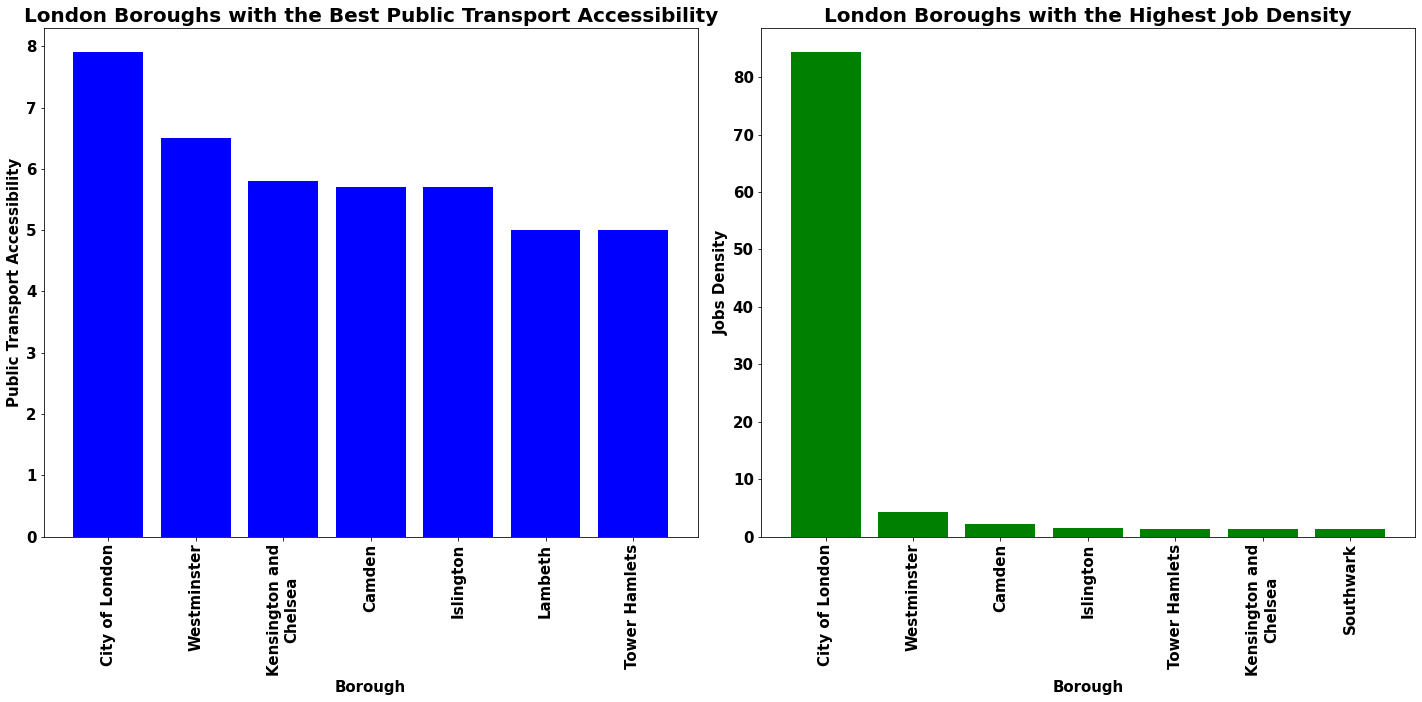

In [25]:
plt.figure(figsize=(20,10))
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font',**font)
# Draw the first sublot 
plt.subplot(1,2,1)
plt.bar(x_transport,y_Transport, color='blue')
plt.xlabel('Borough',fontsize=15,weight='bold')
plt.ylabel('Public Transport Accessibility',fontsize=15,weight='bold')
plt.xticks(np.arange(Top_number),[textwrap.fill(borough,15) for borough in x_transport],rotation=90,horizontalalignment="center")
plt.title('London Boroughs with the Best Public Transport Accessibility',weight='bold',fontsize=20)

#Draw the second subplot
plt.subplot(1,2,2)
plt.bar(x_job,y_job,color='green')
plt.xlabel('Borough',fontsize=15,weight='bold')
plt.ylabel('Jobs Density',fontsize=15,weight='bold')
plt.xticks(np.arange(Top_number),[textwrap.fill(borough,15) for borough in x_job],rotation=90,horizontalalignment="center")
plt.title('London Boroughs with the Highest Job Density',weight='bold',fontsize=20)

plt.tight_layout()
plt.show()


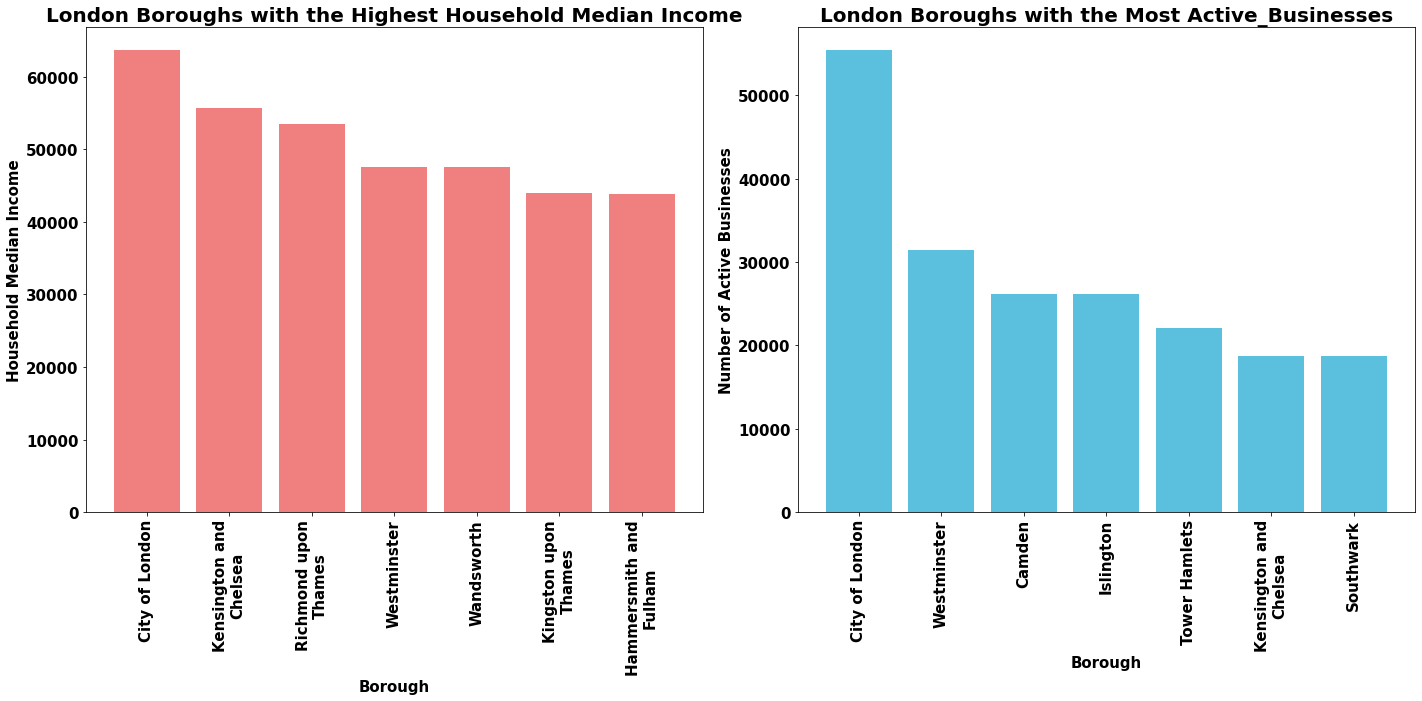

In [26]:
plt.figure(figsize=(20,10))
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font',**font)
# Draw the first sublot 
plt.subplot(1,2,1)
plt.bar(x_income,y_income, color='lightcoral')
plt.xlabel('Borough',fontsize=15,weight='bold')
plt.ylabel('Household Median Income',fontsize=15,weight='bold')
plt.xticks(np.arange(Top_number),[textwrap.fill(borough,15) for borough in x_income],rotation=90,horizontalalignment="center")
plt.title('London Boroughs with the Highest Household Median Income',weight='bold',fontsize=20)

#Draw the second subplot
plt.subplot(1,2,2)
plt.bar(x_prosperity,y_prosperity,color='#5bc0de')
plt.xlabel('Borough',fontsize=15,weight='bold')
plt.ylabel('Number of Active Businesses',fontsize=15,weight='bold')
plt.xticks(np.arange(Top_number),[textwrap.fill(borough,15) for borough in x_job],rotation=90,horizontalalignment="center")
plt.title('London Boroughs with the Most Active_Businesses',weight='bold',fontsize=20)

plt.tight_layout()
plt.show()


In [27]:
! pip install xlrd

In [28]:
link2="https://data.london.gov.uk/download/ethnic-groups-borough/9355e8a2-8637-430e-a2e6-e1af650429fa/ethnic-groups-by-borough.xls"
df_ethnic=pd.read_excel(link2,sheet_name='2018',skiprows=range(1),skipfooter=15)
df_ethnic.head()

,Unnamed: 0,Unnamed: 1,White,Asian,Black,Mixed/ Other,Total,Unnamed: 7,White.1,Asian.1,Black.1,Mixed/ Other.1,Total.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E09000001,City of London,-,-,-,-,9000.0,NaN,-,-,-,-,6000.0
2,E09000002,Barking and Dagenham,109000,54000,36000,15000,215000.0,NaN,11000,8000,6000,4000,15000.0
3,E09000003,Barnet,250000,57000,30000,54000,390000.0,NaN,22000,10000,7000,10000,27000.0
4,E09000004,Bexley,195000,17000,21000,15000,248000.0,NaN,15000,5000,5000,4000,17000.0


In [29]:
df_ethnic=df_ethnic.iloc[:,1:7]
df_ethnic.drop([0],axis=0,inplace=True)
df_ethnic.columns=['Borough','White','Asian','Black','Mixed_Other','Total']
df_ethnic.head()

,Borough,White,Asian,Black,Mixed_Other,Total
1,City of London,-,-,-,-,9000.0
2,Barking and Dagenham,109000,54000,36000,15000,215000.0
3,Barnet,250000,57000,30000,54000,390000.0
4,Bexley,195000,17000,21000,15000,248000.0
5,Brent,102000,107000,62000,56000,328000.0


In [30]:
df_ethnic.dtypes

Borough         object
White           object
Asian           object
Black           object
Mixed_Other     object
Total          float64
dtype: object

In [31]:
cols=df_ethnic.columns.drop(['Borough'])
df_ethnic[cols]=df_ethnic[cols].apply(pd.to_numeric, errors='coerce')
df_ethnic.head()

,Borough,White,Asian,Black,Mixed_Other,Total
1,City of London,NaN,NaN,NaN,NaN,9000.0
2,Barking and Dagenham,109000.0,54000.0,36000.0,15000.0,215000.0
3,Barnet,250000.0,57000.0,30000.0,54000.0,390000.0
4,Bexley,195000.0,17000.0,21000.0,15000.0,248000.0
5,Brent,102000.0,107000.0,62000.0,56000.0,328000.0


In [32]:
#identify missing values
missing_data_e=df_ethnic.isnull()
for column in missing_data_e.columns.values.tolist():
    print(missing_data_e[column].value_counts())

False    33
Name: Borough, dtype: int64
False    32
True      1
Name: White, dtype: int64
False    32
True      1
Name: Asian, dtype: int64
False    31
True      2
Name: Black, dtype: int64
False    32
True      1
Name: Mixed_Other, dtype: int64
False    33
Name: Total, dtype: int64


In [33]:
# drop missing value
df_ethnic=df_ethnic.dropna(axis=0)


In [34]:
df_ethnic.reset_index(drop=True,inplace=True)
df_ethnic

,Borough,White,Asian,Black,Mixed_Other,Total
0,Barking and Dagenham,109000.0,54000.0,36000.0,15000.0,215000.0
1,Barnet,250000.0,57000.0,30000.0,54000.0,390000.0
2,Bexley,195000.0,17000.0,21000.0,15000.0,248000.0
3,Brent,102000.0,107000.0,62000.0,56000.0,328000.0
4,Bromley,267000.0,15000.0,21000.0,28000.0,330000.0
5,Camden,158000.0,39000.0,19000.0,38000.0,255000.0
6,Croydon,227000.0,70000.0,64000.0,24000.0,386000.0
7,Ealing,174000.0,96000.0,23000.0,50000.0,343000.0
8,Enfield,206000.0,37000.0,74000.0,20000.0,337000.0
9,Greenwich,178000.0,39000.0,48000.0,19000.0,284000.0


In [35]:
# The targeted ethic group are asian and mixed other, choose top 5 boroughs that contains the highest population of these two ethic group together. 
df_ethnic['Target_Ethnic_Group']=df_ethnic['Asian']+df_ethnic['Mixed_Other']
df_ethnic

,Borough,White,Asian,Black,Mixed_Other,Total,Target_Ethnic_Group
0,Barking and Dagenham,109000.0,54000.0,36000.0,15000.0,215000.0,69000.0
1,Barnet,250000.0,57000.0,30000.0,54000.0,390000.0,111000.0
2,Bexley,195000.0,17000.0,21000.0,15000.0,248000.0,32000.0
3,Brent,102000.0,107000.0,62000.0,56000.0,328000.0,163000.0
4,Bromley,267000.0,15000.0,21000.0,28000.0,330000.0,43000.0
5,Camden,158000.0,39000.0,19000.0,38000.0,255000.0,77000.0
6,Croydon,227000.0,70000.0,64000.0,24000.0,386000.0,94000.0
7,Ealing,174000.0,96000.0,23000.0,50000.0,343000.0,146000.0
8,Enfield,206000.0,37000.0,74000.0,20000.0,337000.0,57000.0
9,Greenwich,178000.0,39000.0,48000.0,19000.0,284000.0,58000.0


In [36]:
df_target_ethnic_top7=df_ethnic.sort_values(by='Target_Ethnic_Group', ascending=False).head(Top_number)[['Borough','Target_Ethnic_Group']]
df_target_ethnic_top7.reset_index(drop=True)

,Borough,Target_Ethnic_Group
0,Newham,193000.0
1,Brent,163000.0
2,Tower Hamlets,147000.0
3,Ealing,146000.0
4,Redbridge,144000.0
5,Hillingdon,128000.0
6,Harrow,126000.0


In [37]:
x_ethnic=df_target_ethnic_top7['Borough'].tolist()
y_ethnic=df_target_ethnic_top7['Target_Ethnic_Group'].tolist()

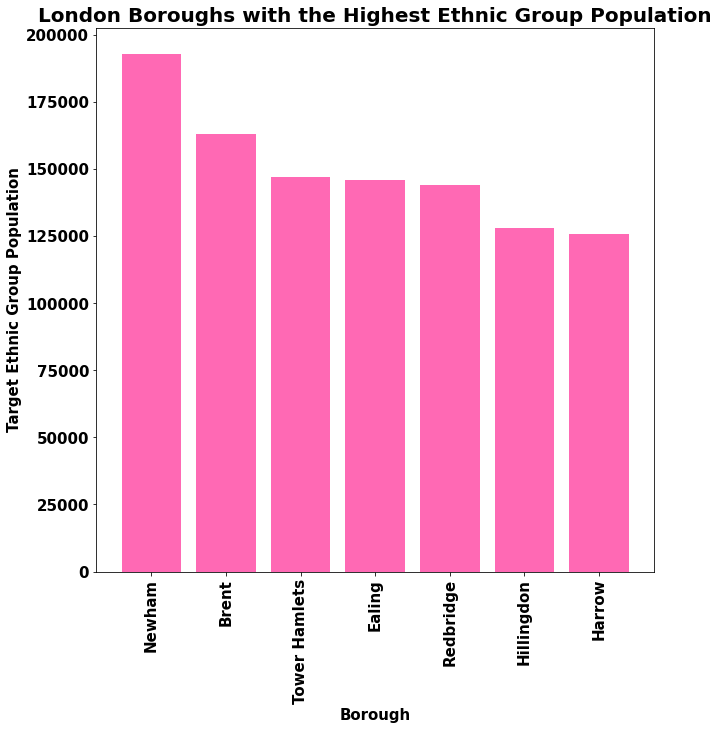

In [38]:
plt.figure(figsize=(10,10))
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font',**font)

plt.bar(x_ethnic,y_ethnic, color='hotpink')
plt.xlabel('Borough',fontsize=15,weight='bold')
plt.ylabel('Target Ethnic Group Population',fontsize=15,weight='bold')
plt.xticks(np.arange(Top_number),[textwrap.fill(borough,15) for borough in x_ethnic],rotation=90,horizontalalignment="center")
plt.title('London Boroughs with the Highest Ethnic Group Population',weight='bold',fontsize=20)

#plt.tight_layout()
plt.show()


**First analysis is to select most suitable boroughs**

**2. Create eveluation matrix and choose the boroughs with the highest scores.** Boroughs are within the top 7 boroughs with the highest Public Transport Accessibility, Job Density, Household Median Income, Active Business and Target Ethnic Group get 1 score respectively. And boroughs that are **NOT** within top 7 boroughs with highest Crime Rates and Median House Price get a score respectively. 

In [39]:
#select five most suitable boroughs
index=set(df_transport_top7['Borough'].tolist()+df_job_top7['Borough'].tolist()+df_income_target['Borough'].tolist()+df_prosperity_top7['Borough'].tolist()+df_crime_top7['Borough'].tolist()+df_house_price_top7['Borough'].tolist()+df_target_ethnic_top7['Borough'].tolist())
column=['Public_Transport_Accessibility','Jobs_Density','Household_Median_Income','Active_Businesses','Crime_Rates','Median_House_Price','Target_Ethnic_Group']
df_Borough_Evaluation=pd.DataFrame(index=index,columns=column)
df_Borough_Evaluation

,Public_Transport_Accessibility,Jobs_Density,Household_Median_Income,Active_Businesses,Crime_Rates,Median_House_Price,Target_Ethnic_Group
Camden,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Westminster,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kingston upon Thames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City of London,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Newham,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hillingdon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kensington and Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ealing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Redbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Richmond upon Thames,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#Boroughs get 1 score if they are within the criterien list of Public_Transport_Accessibility,Jobs_Density,Household_Median_Income,Active_Businesses,Target_Ethnic_Group
df_Borough_Evaluation.loc[df_transport_top7['Borough'].tolist(),'Public_Transport_Accessibility'] = 1
df_Borough_Evaluation.loc[df_job_top7['Borough'].tolist(),'Jobs_Density'] = 1
df_Borough_Evaluation.loc[df_income_target['Borough'].tolist(),'Household_Median_Income'] = 1
df_Borough_Evaluation.loc[df_prosperity_top7['Borough'].tolist(),'Active_Businesses'] = 1
df_Borough_Evaluation.loc[df_target_ethnic_top7['Borough'].tolist(),'Target_Ethnic_Group'] = 1

In [41]:
# Boroughs get 1 score if they are NOT within the high crime and high house price list. 
list_1=df_Borough_Evaluation.index.values.tolist()
list_2=df_crime_top7['Borough'].tolist()
list_3=df_house_price_top7['Borough'].tolist()
row_crime=[item for item in list_1 if item not in list_2]
row_house_price=[item for item in list_1 if item not in list_3]
df_Borough_Evaluation.loc[row_crime,'Crime_Rates'] = 1
df_Borough_Evaluation.loc[row_house_price,'Median_House_Price'] = 1

In [42]:
df_Borough_Evaluation=df_Borough_Evaluation.replace(np.nan, 0)
df_Borough_Evaluation['Total_Score']=df_Borough_Evaluation.sum(axis=1)
df_Borough_Evaluation.sort_values(by='Total_Score', ascending=False,inplace=True)
df_Borough_Evaluation=df_Borough_Evaluation.head(8)
df_Borough_Evaluation

,Public_Transport_Accessibility,Jobs_Density,Household_Median_Income,Active_Businesses,Crime_Rates,Median_House_Price,Target_Ethnic_Group,Total_Score
City of London,1,1,1,1,1,0,0,5
Tower Hamlets,1,1,0,0,1,1,1,5
Camden,1,1,1,1,0,0,0,4
Wandsworth,0,0,1,1,1,1,0,4
Barnet,0,0,1,1,1,1,0,4
Ealing,0,0,0,1,1,1,1,4
Westminster,1,1,1,1,0,0,0,4
Brent,0,0,0,0,1,1,1,3


In [43]:
# select bouroughs with the highest score
Max_Score=df_Borough_Evaluation['Total_Score'].max()
Target_London_Boroughs=df_Borough_Evaluation.loc[df_Borough_Evaluation['Total_Score']==Max_Score,:].index.values.tolist()
print("Target London Boroughs are", Target_London_Boroughs)

Target London Boroughs are ['City of London', 'Tower Hamlets']


In [44]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [45]:
df_Borough_Evaluation_top8=df_Borough_Evaluation.head(8)
Boroughs=df_Borough_Evaluation_top8.index.tolist()
Parameters=df_Borough_Evaluation_top8.columns.tolist()
Score= df_Borough_Evaluation_top8.to_numpy()

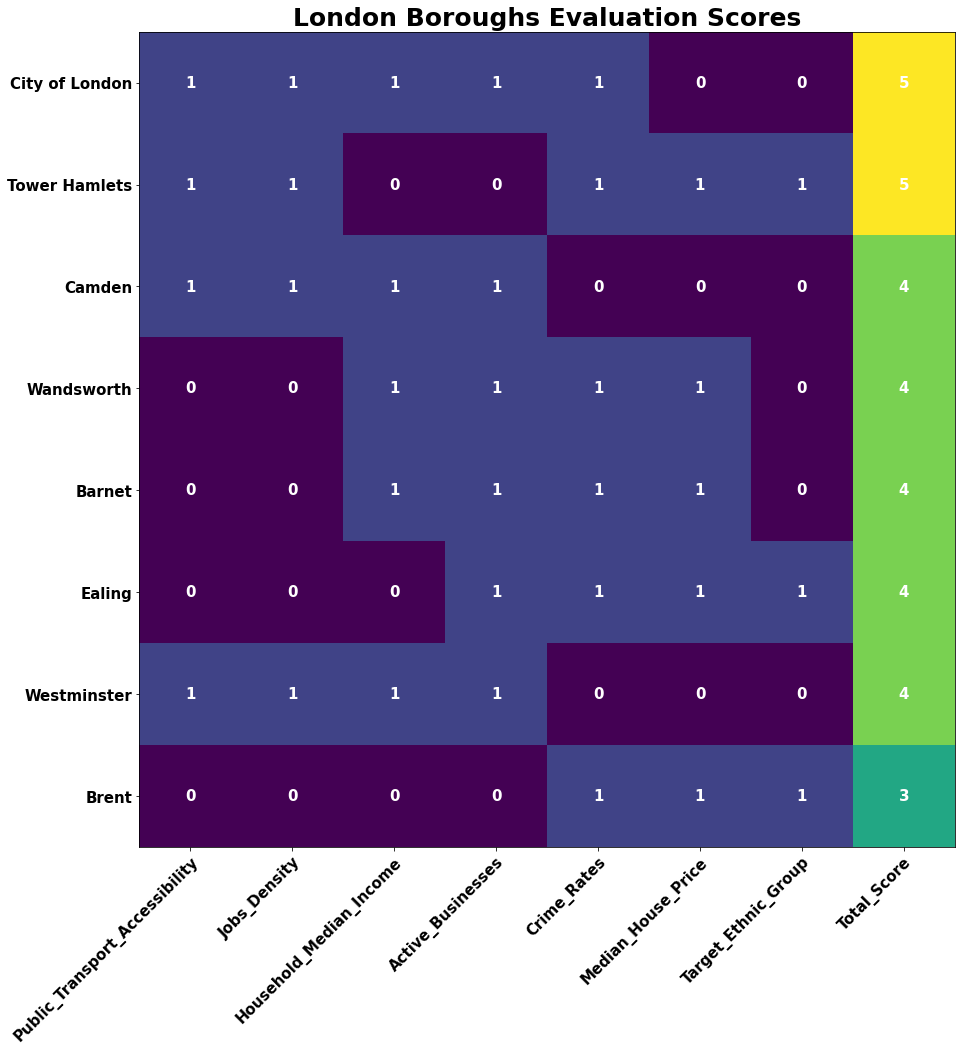

In [46]:
font = {'weight' : 'bold',
        'size'   : 15}
plt.rc('font',**font)

fig, ax=plt.subplots(figsize=(15,15))
im=ax.imshow(Score)

ax.set_xticks(np.arange(len(Parameters)))
ax.set_yticks(np.arange(len(Boroughs)))
ax.set_xticklabels(Parameters)
ax.set_yticklabels(Boroughs)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
for i in range(len(Parameters)):
    for j in range(len(Boroughs)):
        text=ax.text(j,i,Score[i,j], ha="center",va="center",color="w")
ax.set_title("London Boroughs Evaluation Scores",weight='bold',fontsize=25)

plt.show()

As the heatmap shown above, City of London and Tower Hamlets are evaluated as optimal boroughs for the new restaurant. 

Next Step is to select the optimal postcode areas within these two boroughs.

In [47]:
link3 = "https://www.doogal.co.uk/UKPostcodesCSV.ashx?area=London"
df_postcode=pd.read_csv(link3, encoding='unicode_escape')
df_postcode.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Nearest station,Distance to station,Postcode area,Postcode district,Police force,Water company,Plus Code,Average Income,Sewage Company,Travel To Work Area
0,BR1 1AA,Yes,51.401546,0.015415,540291,168873,TQ402688,Greater London,Bromley,Bromley Town,...,Bromley South,0.218257,BR,BR1,Metropolitan Police,Thames Water,9F32C228+J5,63100,NaN,London
1,BR1 1AB,Yes,51.406333,0.015208,540262,169405,TQ402694,Greater London,Bromley,Bromley Town,...,Bromley North,0.253666,BR,BR1,Metropolitan Police,Thames Water,9F32C248+G3,56100,NaN,London
2,BR1 1AD,No,51.400057,0.016715,540386,168710,TQ403687,Greater London,Bromley,Bromley Town,...,Bromley South,0.044559,BR,BR1,Metropolitan Police,NaN,9F32C228+2M,63100,NaN,London
3,BR1 1AE,Yes,51.404543,0.014195,540197,169204,TQ401692,Greater London,Bromley,Bromley Town,...,Bromley North,0.462939,BR,BR1,Metropolitan Police,Thames Water,9F32C237+RM,63100,NaN,London
4,BR1 1AF,Yes,51.401392,0.014948,540259,168855,TQ402688,Greater London,Bromley,Bromley Town,...,Bromley South,0.227664,BR,BR1,Metropolitan Police,Thames Water,9F32C227+HX,63100,NaN,London


In [48]:
# get dataframe information
df_postcode.shape
# exact useful information
# delete the postcode which are not in use any more.
df_pca=df_postcode[df_postcode['In Use?']=='Yes']
print(df_postcode.shape)
print(df_pca.shape)

(323306, 49)
(179130, 49)


In [49]:
column_names=['Postcode','Latitude','Longitude','District','Rural/urban','Nearest station','Distance to station','Average Income']
df_pca_key=df_pca.loc[:,column_names]
df_pca_key.columns=['Postcode','Latitude','Longitude','Borough','Rural_Urban','Nearest_Station','Distance_to_Station','Average_Income']
df_pca_key.head()

,Postcode,Latitude,Longitude,Borough,Rural_Urban,Nearest_Station,Distance_to_Station,Average_Income
0,BR1 1AA,51.401546,0.015415,Bromley,Urban major conurbation,Bromley South,0.218257,63100
1,BR1 1AB,51.406333,0.015208,Bromley,Urban major conurbation,Bromley North,0.253666,56100
3,BR1 1AE,51.404543,0.014195,Bromley,Urban major conurbation,Bromley North,0.462939,63100
4,BR1 1AF,51.401392,0.014948,Bromley,Urban major conurbation,Bromley South,0.227664,63100
5,BR1 1AG,51.401392,0.014948,Bromley,Urban major conurbation,Bromley South,0.227664,63100


In [50]:
#get unique value of rural_urban column
df_pca_key.Rural_Urban.unique()

array(['Urban major conurbation', 'Urban city and town',
       'Rural hamlet and isolated dwellings', 'Rural town and fringe',
       'Rural village'], dtype=object)

In [51]:
#drop all the postcode areas that are located in the rural areas
df_pca_urban=df_pca_key[df_pca_key['Rural_Urban'].isin(['Urban major conurbation','Urban city and town'])]
df_pca_urban.head()
df_pca_urban.shape

(178488, 8)

In [52]:
# check the data type
df_pca_urban.dtypes

Postcode                object
Latitude               float64
Longitude              float64
Borough                 object
Rural_Urban             object
Nearest_Station         object
Distance_to_Station    float64
Average_Income           int64
dtype: object

In [53]:
# identiy missing values
missing_data_p=df_pca_urban.isnull()
for column in missing_data_p.columns.values.tolist():
    print(missing_data_p[column].value_counts())

False    178488
Name: Postcode, dtype: int64
False    178488
Name: Latitude, dtype: int64
False    178488
Name: Longitude, dtype: int64
False    178488
Name: Borough, dtype: int64
False    178488
Name: Rural_Urban, dtype: int64
False    178488
Name: Nearest_Station, dtype: int64
False    178488
Name: Distance_to_Station, dtype: int64
False    178488
Name: Average_Income, dtype: int64


In [54]:
# select post code areas within the target boroughs to narrow down optimal areas in London
df_pca_target=df_pca_urban[df_pca_urban['Borough'].isin(Target_London_Boroughs)]
df_pca_target.shape


(7343, 8)

In [55]:
# select postcode areas that are within 0.3 mile to station 
df_pc_target=df_pca_target.loc[df_pca_target['Distance_to_Station']<=0.3]
# select average income between £30000 and £80000
df_pc_target=df_pc_target.loc[df_pca_target['Average_Income']<=80000]
df_pc_target.head()

,Postcode,Latitude,Longitude,Borough,Rural_Urban,Nearest_Station,Distance_to_Station,Average_Income
28599,E1 0AD,51.512910,-0.055323,Tower Hamlets,Urban major conurbation,Shadwell,0.210203,43200
28604,E1 0AJ,51.511258,-0.052785,Tower Hamlets,Urban major conurbation,Shadwell,0.285947,62600
28610,E1 0AS,51.511572,-0.052685,Tower Hamlets,Urban major conurbation,Shadwell,0.294377,62600
28611,E1 0AT,51.513148,-0.054364,Tower Hamlets,Urban major conurbation,Shadwell,0.270899,43200
28612,E1 0AU,51.511313,-0.053388,Tower Hamlets,Urban major conurbation,Shadwell,0.244211,62600


In [56]:
df_pc_target.shape

(3418, 8)

In [57]:
from sklearn.cluster import KMeans
number_of_clusters = 30
target_location=df_pc_target[['Latitude','Longitude']].values
kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(target_location)

In [58]:
cluster_center=kmeans.cluster_centers_
cluster_center

array([[ 5.15118759e+01, -7.83364034e-02],
       [ 5.15267222e+01, -2.57566389e-02],
       [ 5.15199943e+01, -5.91316099e-02],
       [ 5.15130687e+01, -9.71992589e-02],
       [ 5.15101998e+01, -1.34511881e-02],
       [ 5.15132206e+01, -9.19046754e-02],
       [ 5.15266663e+01, -5.63342362e-02],
       [ 5.15103398e+01, -2.65761167e-02],
       [ 5.14973046e+01, -1.65285714e-02],
       [ 5.15243641e+01, -1.29116711e-02],
       [ 5.15171567e+01, -7.98286845e-02],
       [ 5.15155892e+01, -1.11059611e-01],
       [ 5.15051570e+01, -5.68563704e-02],
       [ 5.15194289e+01, -9.71741360e-02],
       [ 5.15322629e+01, -5.85603013e-02],
       [ 5.15082577e+01, -4.92220175e-03],
       [ 5.15124356e+01, -3.93524943e-02],
       [ 5.15114822e+01, -8.54883636e-02],
       [ 5.15218494e+01, -4.75631034e-02],
       [ 5.14882048e+01, -1.16328636e-02],
       [ 5.15262216e+01, -1.97832000e-02],
       [ 5.15422214e+01, -2.42161765e-02],
       [ 5.15250792e+01, -3.21391579e-02],
       [ 5.

In [59]:
Column_names=['Latitude','Longitude']
df_cluster=pd.DataFrame(data=cluster_center,columns=Column_names)
df_cluster

,Latitude,Longitude
0,51.511876,-0.078336
1,51.526722,-0.025757
2,51.519994,-0.059132
3,51.513069,-0.097199
4,51.510200,-0.013451
5,51.513221,-0.091905
6,51.526666,-0.056334
7,51.510340,-0.026576
8,51.497305,-0.016529
9,51.524364,-0.012912


In [60]:
## import libraries and packages
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into Latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # transform JSON file into a pandas dataframe

# import Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib. colors as colors

# import k-means from clustering stage
from sklearn. cluster import KMeans

import folium # map rendering library

print('Libraries imported')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_0         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         378 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch

In [61]:
# get the geographical coordinates of London from google
latitude=51.5074
longitude=0.1278

In [62]:
london_boroughs_url = 'https://skgrange.github.io/www/data/london_boroughs.json'
london_boroughs = requests.get(london_boroughs_url).json()

def boroughs_style(feature):
    return { 'color': 'blue', 'fill': False }

In [ ]:
#visualise the target post code area 
map_london=folium.Map(location=[latitude, longitude],zoom_start=11)

#add markers to map
for lat, lng,label in zip(df_pc_target['Latitude'],df_pc_target['Longitude'],df_pc_target['Postcode']):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_london)
folium.GeoJson(london_boroughs, style_function=boroughs_style, name='geojson').add_to(map_london)
map_london

In [ ]:
#visualise the target post code area 
map_london=folium.Map(location=[latitude, longitude],zoom_start=11)

#add markers to map
for lat, lng in zip(df_cluster['Latitude'],df_cluster['Longitude']):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_london)
folium.GeoJson(london_boroughs, style_function=boroughs_style, name='geojson').add_to(map_london)
map_london

In [ ]:
# define Foursquare Credentials and Version 
CLIENT_ID='PHXA1F5GG3YMULB2ZTRIFNGFAX2Y1Y4LDTCJSXN0ROJO30S0'
CLIENT_SECRET='RGH4JUVFSRPCTOLJQQHWQJBYBIDS51SNPYDTHIFEVPUJBKJH'
VERSION='20180605'
LIMIT=10

In [ ]:
def getNearbyVenues(latitudes, longitudes, radius=500):
    
    venues_list=[]
    for lat, lng in zip(latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
    

In [ ]:
venues=getNearbyVenues(latitudes=df_cluster['Latitude'],longitudes=df_cluster['Longitude'])
venues.head(10)

In [ ]:
print(venues.shape)
venues.dtypes

In [ ]:
venues.groupby(['Latitude','Longitude'])['Venue'].count()

**Competitor Analysis**
1. Delete the location which have Chinese Restaurant and Turkish Restaurant in the radius of 500m

In [ ]:
df_venues_Chinese_Restaurant=venues[venues['Venue Category'].str.contains('Chinese Restaurant')]
CR_Lat=df_venues_Chinese_Restaurant['Latitude'].tolist()
len(CR_Lat)

In [ ]:
df_venues_Turkish_Restaurant=venues[venues['Venue Category'].str.contains('Turkish Restaurant')]
TR_Lat=df_venues_Turkish_Restaurant['Latitude'].tolist()
len(TR_Lat)

In [ ]:
CR_TR_Lat=CR_Lat+TR_Lat
len(CR_TR_Lat)

In [ ]:
for lat in CR_TR_Lat:
    venues=venues.loc[venues['Latitude']!=lat,:]

venues.shape


In [ ]:
# Get the number of locatiosn that donot have Turkish and Chinese Restaurant in the radius of 500m
len(venues['Latitude'].unique().tolist())


In [ ]:
# Remove the locations that have more than 1 other restaurants in the radius of 500m
df_venues_Restaurant=venues[venues['Venue Category'].str.contains('Restaurant')]
df_venues_Restaurant_groupby=df_venues_Restaurant.groupby(['Latitude','Longitude'])['Venue'].count().to_frame(name='Number_of_Other_Restaurants')
df_venues_Restaurant_groupby=df_venues_Restaurant_groupby.reset_index()
df_venues_Restaurant_groupby


**Competitor Analysis**

2. Select the location that have less than 1 restaurant in the radius of 500m

In [ ]:
df_optimal1=df_venues_Restaurant_groupby.loc[df_venues_Restaurant_groupby['Number_of_Other_Restaurants']==1]
df_optimal1=df_optimal1[['Latitude','Longitude']].reset_index().drop('index',axis=1)
df_optimal1

In [ ]:
df_optimal1.shape

In [ ]:
# select the locations that have no restaurants in the radius of 500m
df_optimal2=venues[~venues['Venue Category'].str.contains('Restaurant')][['Latitude','Longitude']]
df_optimal2.shape

In [ ]:
df_optimal2.drop_duplicates(inplace=True)
df_optimal2.shape

In [ ]:
for lat in df_venues_Restaurant_groupby['Latitude'].tolist():
    df_optimal2=df_optimal2.loc[df_optimal2['Latitude']!=lat]

df_optimal2.shape


In [ ]:
# combine the two selected optimal dataframe
#bigdata = pd.concat([data1, data2], ignore_index=True, sort=False)
df_optimal=pd.concat([df_optimal1,df_optimal2], ignore_index=True)
df_optimal

In [ ]:
!pip install ipython-autotime
%load_ext autotime
! pip install geopandas
! pip install geopy
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
! pip install tqdm
import tqdm
from tqdm._tqdm_notebook import tqdm_notebook
print("Libraries are installed")

In [ ]:
# convert the coordinates to adresses
pd.set_option('display.max_colwidth', -1)
df_optimal['Geom']=df_optimal['Latitude'].map(str)+','+df_optimal['Longitude'].map(str)
locator=Nominatim(user_agent="myGeocoder",timeout=10)
rgeocode=RateLimiter(locator.reverse, min_delay_seconds=0.001)
tqdm_notebook.pandas()
df_optimal['Address']=df_optimal['Geom'].progress_apply(rgeocode)
df_optimal.head()


In [ ]:
df_optimal=df_optimal.drop(['Geom'],axis=1)
df_optimal

## Results <a name="results"></a>

In [ ]:
#visualise the target post code area 
map_london=folium.Map(location=[latitude, longitude],zoom_start=12)

#add markers to map
for lat, lng,label in zip(df_optimal['Latitude'],df_optimal['Longitude'],df_optimal['Address']):
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_london)
folium.GeoJson(london_boroughs, style_function=boroughs_style, name='geojson').add_to(map_london)
map_london

## Discussion <a name="discussion"></a>

## Conclusion <a name="conclusion"></a>